# Data analysis

## Libraries

In [341]:
library(tidyverse)
library(ggplot2)
library(expint)
library(rvalues)
library(mosaic)
library(pracma)

## Reading the data

In [306]:
df <- read.csv('ERG_simulation_data3.csv')

In [307]:
head(df)

,nodes,max.update,n.seeds,threshold,z,time,n.run,cascade.fraction
,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<dbl>
1,10000,100,1,0.1,1,2,10,0.0486
2,10000,100,1,0.1,2,24,10,6.3602
3,10000,100,1,0.1,3,15,10,9.4002
4,10000,100,1,0.1,4,13,10,8.8176
5,10000,100,1,0.1,5,12,10,9.9270
6,10000,100,1,0.1,6,11,10,9.9738


## Dividing cascade and not

In [308]:
cascade <- df |> filter(cascade.fraction>=0.1)
no_cascade <- df |> filter(cascade.fraction <0.1)

## Plot of the data

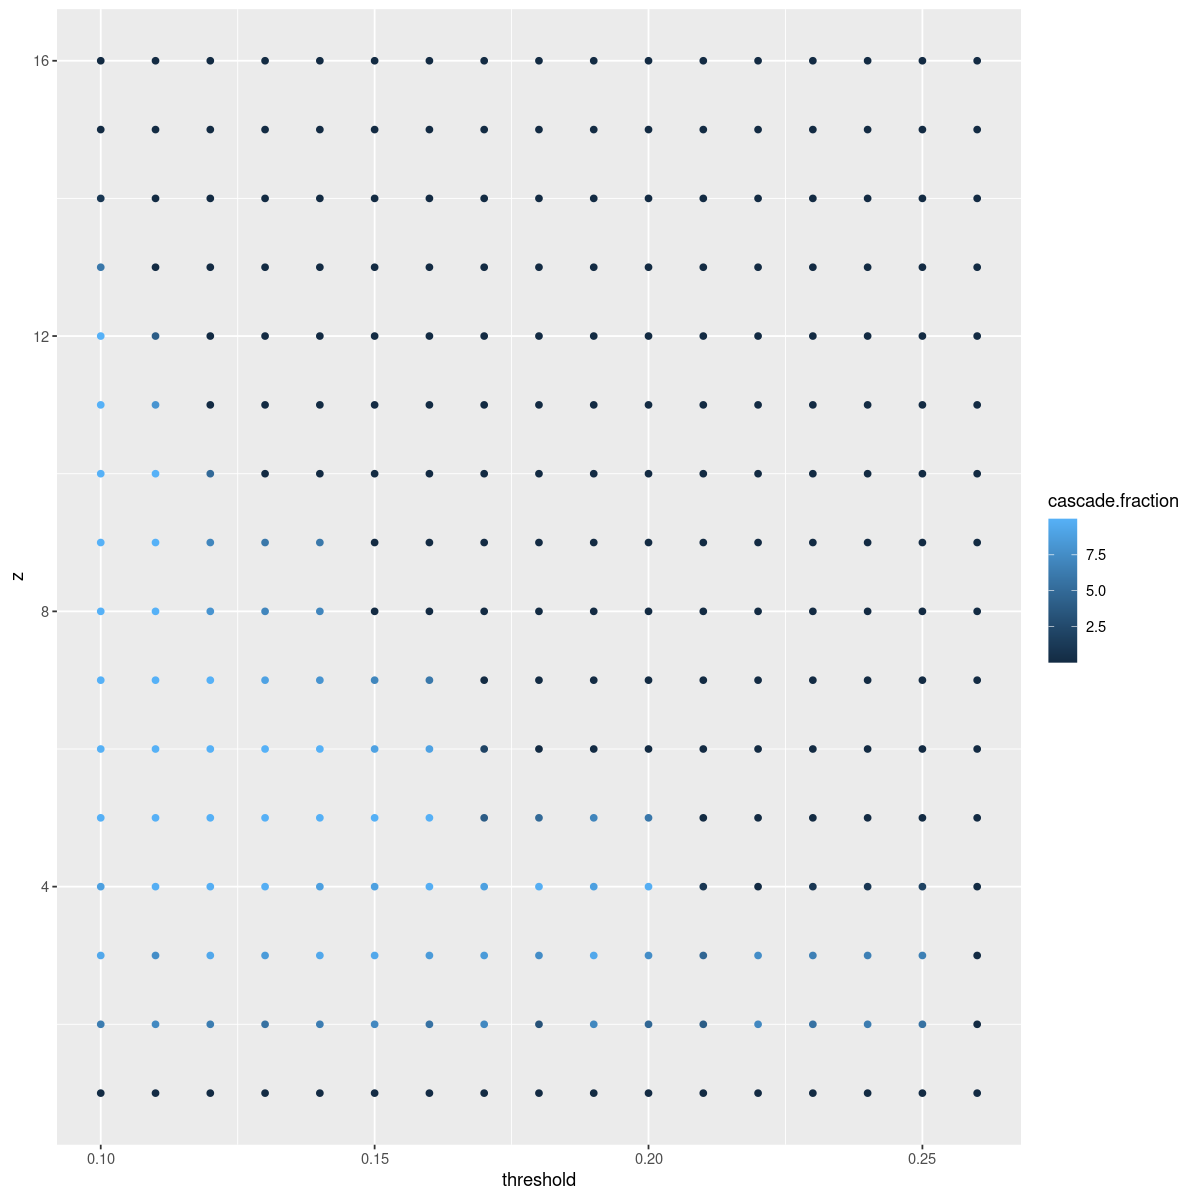

In [309]:
ggplot(df,aes(x=threshold,y=z, col=cascade.fraction))+geom_point()

## Theoretical prediction

### Grid approach

In [310]:
#grid for theoretical prediction
phi <- seq(from = 0.1, to = 0.26, by=0.001)
z <- seq(from=1, to=16, by=0.01)
var <- expand.grid(z, phi)

In [311]:
fun <- vector()
for (i in 1:nrow(var)){
    fun[i]<-var[i,1]*gammainc(floor(1/var[i, 2])-1, var[i,1])-1 
}


In [312]:
prediction <- data.frame(var[,1], var[,2], fun)
colnames(prediction) <- c('z', 'phi', 'fun')

In [324]:
theoretical_cascade <- prediction |> filter(abs(fun)>1)

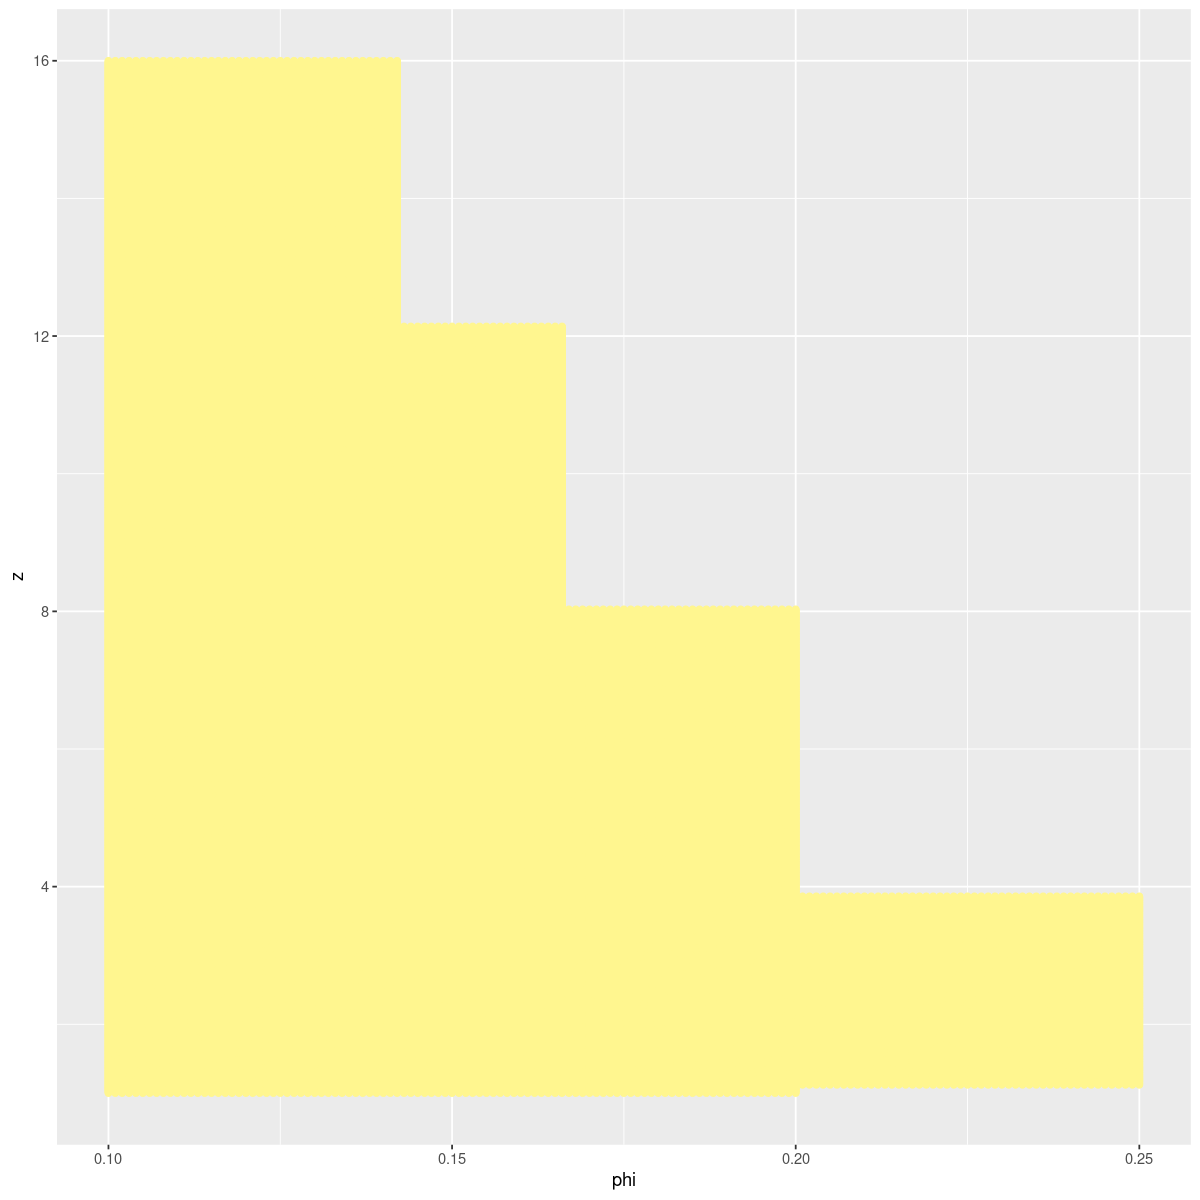

In [325]:
#plot of theoretical predicition
ggplot() +
    geom_point(data = theoretical_cascade, aes(x=phi, y=z, colour='Theoretical cascade area'), col='khaki1')

## Comparison between theoretical prediction and data

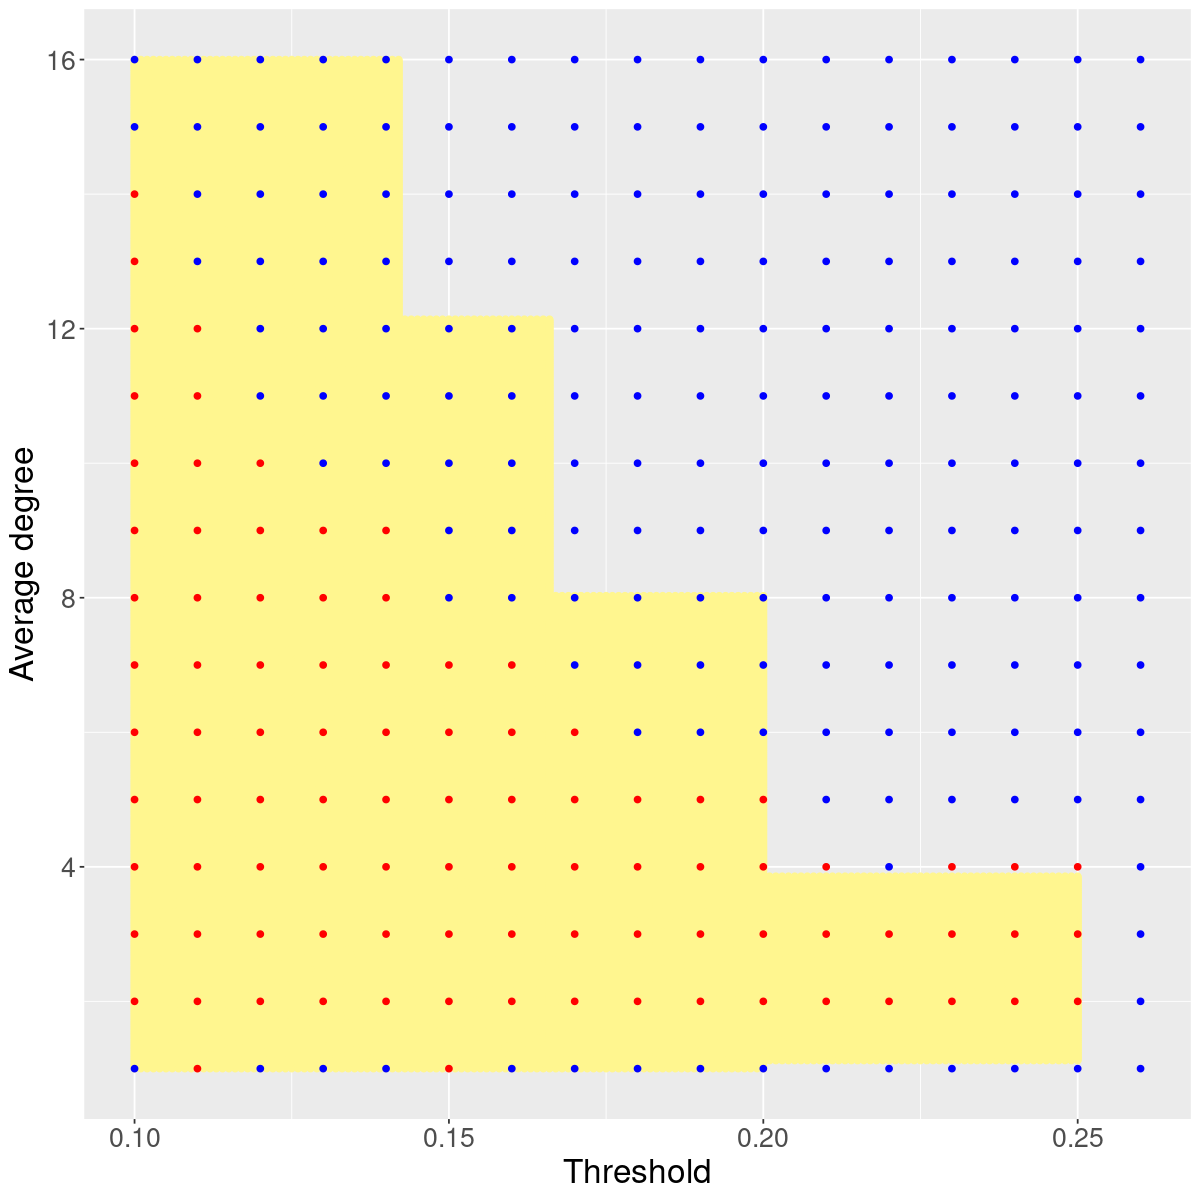

In [326]:
options(repr.plot.width = 10, repr.plot.height = 10)

ggplot() +
    geom_point(data = theoretical_cascade, aes(x=phi, y=z, colour= 'Theoretical cascade region'), col='khaki1')+
    geom_point(data = cascade, aes(x=threshold,y=z, colour='Empirical cascade'), col='red')+
    geom_point(data = no_cascade, aes(x=threshold,y=z, colour='No empirical cascade'), col='blue')+
    xlab(label = 'Threshold')+
    ylab(label = 'Average degree')+
    theme(text = element_text(size = 20)) 


## Solution of cascade condition

In [371]:
phi <- seq(from = 0.1, to = 0.26, by=0.1)

for (i in seq_along(phi)){
    fun <- function(z){
        out <- vector()
        for (j in length(z)){
            out[j]<-z[j]*incgam(z[j], floor(1/phi[i])-1)-1 
            #print(out[j])
        } 
        return(out)
    }
    
    root <- findzeros(fun, a=0, b=16)
    print(root)
}

ERROR: Error in if (d == 0) next: valore mancante dove è richiesto TRUE/FALSE


In [367]:
length(1:3)

[1] 3

In [369]:
fun(1:10)

[1] 134191.9


[1]       NA       NA       NA       NA       NA       NA       NA       NA
 [9]       NA 134191.9

In [336]:
phi[i]

[1] 0.1

In [342]:
f <- function(x){
    return(sin(x))
}

#uniroot(f, lower=0, upper=16)
findzeros(f, a=0, b=16)

[1]  0.000000  3.141611  6.283185  9.424791 12.566357 15.707963

In [347]:
gammainc(floor(1/0.1)-1, 1)

lowinc       uppinc       reginc 
0.9998765902 0.0001234098 0.9998765902

In [345]:
phi[i]

[1] 0.1